In [1]:
import math
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage 
import os
from os.path import isfile, join
import random

from skimage.feature import local_binary_pattern
from scipy.stats import itemfreq
from sklearn.preprocessing import normalize


folder_path = '../atividade_final/dat'

In [4]:
class ImageItem:
    def __init__(self, image_name, image_path, image_class):
        self.image_name = image_name
        self.image_path = image_path
        self.image_class = image_class  
        
    def read_image(self):
        return cv2.imread(self.image_path, cv2.IMREAD_GRAYSCALE)
    
    def __str__(self):
        return "class: '%s', path: '%s'" % (self.image_class, self.image_path)

class ImageItemCollection:
    def __init__(self):
        self.array = []
        self.by_class = {}
        
    def append(self, image_item):
        self.array.append(image_item)
        if not (image_item.image_class in self.by_class):
            self.by_class[image_item.image_class] = []
        self.by_class[image_item.image_class].append(image_item)
        
    def build_training_and_validation_sets(self, training_pct = 0.7):
        training_set = []
        validation_set = []
        for class_key in self.by_class:
            class_items = items.by_class[class_key]
            training_ammount = int(len(class_items) * training_pct)

            #shuffle without changing image_collection following functional principles
            shuffle_result = sorted(class_items, key=lambda class_items: random.random())

            for i in range(0,len(shuffle_result)):
                if i < training_ammount:
                    training_set.append(shuffle_result[i])
                else:
                    validation_set.append(shuffle_result[i])
        return (training_set, validation_set)
    
class EpDefaultReader:
    @staticmethod
    def list_files(folder_path):
        folder_items = os.listdir(folder_path)
        folder_files = [f for f in folder_items if isfile(join(folder_path, f))]
        return folder_files
    @staticmethod
    def get_image_class(folder_file):
        return folder_file.split("_")[0]
    @staticmethod
    def load_items(folder_path):
        folder_files = EpDefaultReader.list_files(folder_path)
        if len(folder_files) <= 0:
            raise ValueError("Folder should contain at least one file")
        items = ImageItemCollection()
        for folder_file in folder_files:
            full_path = join(folder_path, folder_file)
            image_class = EpDefaultReader.get_image_class(folder_file)
            items.append(ImageItem(folder_file, full_path, image_class))
        return items

    

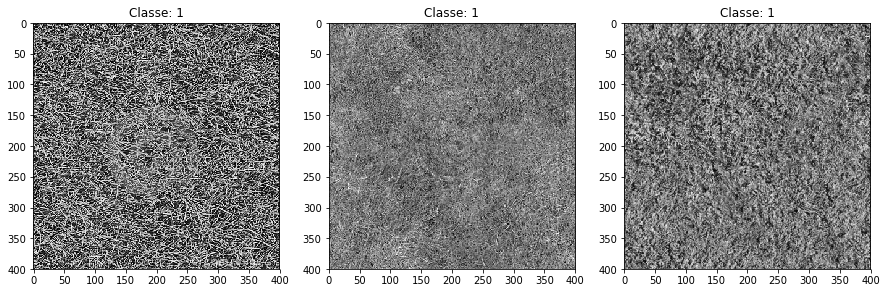

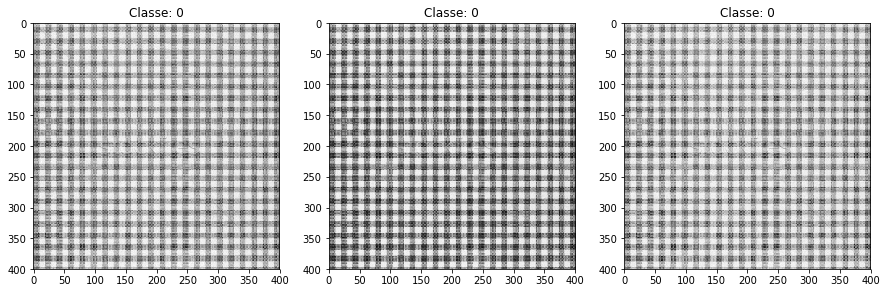

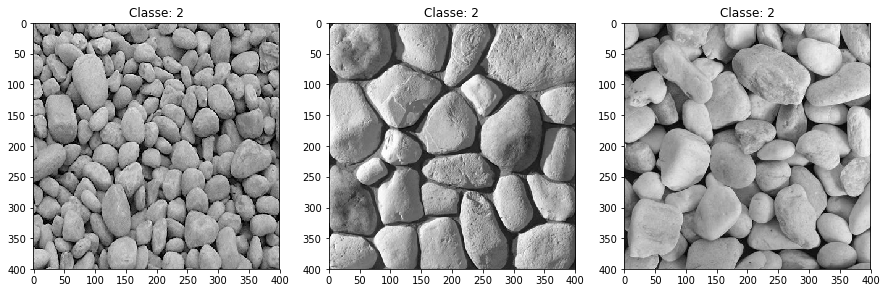

In [5]:
items = EpDefaultReader.load_items(folder_path)

for class_key in items.by_class:
    class_items = items.by_class[class_key]
    fig, imgs = plt.subplots(1,len(class_items), figsize=(15,5))
    for i in range(len(class_items)):
        image = class_items[i].read_image()
        imgs[i].imshow(image, cmap='gray')
        imgs[i].set_title("Classe: %s" % (class_items[i].image_class))
    plt.show()
    

Training


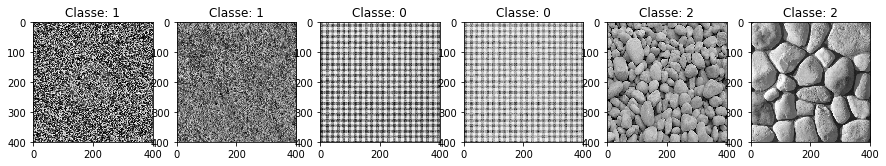

Validation


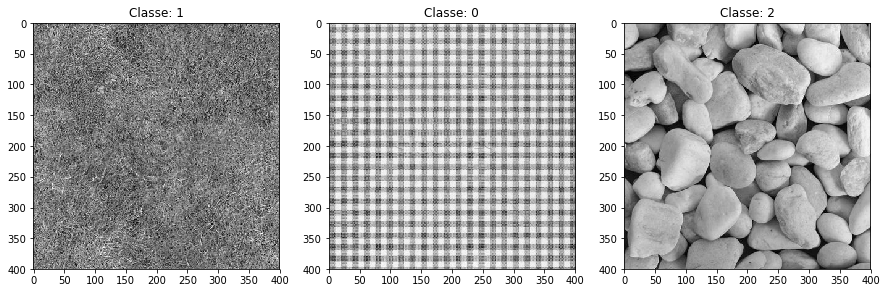

In [6]:
(training_set, validation_set) = items.build_training_and_validation_sets()

print("Training")
fig, imgs = plt.subplots(1,len(training_set), figsize=(15,5))
for i in range(len(training_set)):
    item = training_set[i]
    image = item.read_image()
    imgs[i].imshow(image, cmap='gray')
    imgs[i].set_title("Classe: %s" % (item.image_class))
plt.show()
    
print("Validation")
fig, imgs = plt.subplots(1,len(validation_set), figsize=(15,5))
for i in range(len(validation_set)):
    item = validation_set[i]
    image = item.read_image()
    imgs[i].imshow(image, cmap='gray')
    imgs[i].set_title("Classe: %s" % (item.image_class))
plt.show()
    

In [ ]:
def calculate_lbp_histogram(image):
    radius = 3
    no_points = 8 * radius
    # Uniform LBP is used
    lbp = local_binary_pattern(image, no_points, radius, method='uniform')
    # Calculate the histogram
    x = itemfreq(lbp.ravel())
    # Normalize the histogram
    hist = x[:, 1]/sum(x[:, 1])
    return hist

histograms = []
histogram_classes = []
for training_item in training_set:
    # Read the image
    image = training_item.read_image()
    histograms.append(calculate_lbp_histogram(image))
    histogram_classes.append(training_item.image_class)
    

    


/home/felipe/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:7: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
